# PyTorch Tutorial
URL: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

In [2]:
import torch
import numpy as np

## Tensors

### Tensor Initialization

In [3]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [5]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype = torch.float)
print(f"Random Tensor: \n {x_rand} \n")


Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4582, 0.6392],
        [0.7159, 0.0364]]) 



In [6]:
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor} \n")


Random Tensor: 
 tensor([[0.4087, 0.3658, 0.9383],
        [0.0612, 0.2461, 0.7701]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



### Tensor Attributes

In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Dtype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Dtype of tensor: torch.float32
Device tensor is stored on: cpu


### Tensor Operations

In [8]:
tensor = torch.ones(4,4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim = 1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [10]:
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
print(f"tensor * tensor \n {tensor * tensor} \n")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 



In [11]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
print(f"tensor @ tensor.T \n {tensor @ tensor.T} \n")


tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 



In [12]:
print(tensor, "\n\n")
tensor.add_(5)
print(tensor, "\n\n")


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 


tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]]) 




### Bridge with NumPy

In [13]:
t = torch.ones(5)
print(f"t: {t}")

n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [14]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [15]:
np.add(n, 1, out = n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([3., 3., 3., 3., 3.])
n: [3. 3. 3. 3. 3.]


## A Gentle Introduction to torch.autograd

### Usage in PyTorch

In [16]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained = True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [17]:
prediction = model(data)

In [18]:
loss = (prediction - labels).sum()
loss.backward()

In [19]:
optim = torch.optim.SGD(model.parameters(), lr = 1e-2, momentum = 0.9)

In [20]:
optim.step()

### Differentiation in Autograd

In [21]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [22]:
Q = 3 * a ** 3 - b ** 2

In [23]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [24]:
print(9 * a ** 2 == a.grad)
print(-2 * b == b.grad)

tensor([True, True])
tensor([True, True])


In [25]:
x = torch.rand(5,5)
y = torch.rand(5,5)
z = torch.rand(5,5, requires_grad=True)

In [26]:
a = x + y
print(f"Does `a` require gradients?: {a.requires_grad}")

Does `a` require gradients?: False


In [27]:
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `b` require gradients?: True


In [28]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

In [29]:
model.fn = nn.Linear(512,10)

In [30]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [31]:
optimizer.step()

## Neural Networks

### Defining the network

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [33]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [34]:
params = list(net.parameters())

In [35]:
len(params)

10

In [36]:
for param in params:
    print(param.size())

torch.Size([6, 1, 3, 3])
torch.Size([6])
torch.Size([16, 6, 3, 3])
torch.Size([16])
torch.Size([120, 576])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [37]:
input = torch.randn(1, 1, 32, 32)
output = net(input)
print(output)

tensor([[-0.0232, -0.0025, -0.1529, -0.0331,  0.0766, -0.0222,  0.0197,  0.1027,
         -0.0179,  0.0045]], grad_fn=<AddmmBackward>)


In [38]:
net.zero_grad()
output.backward(torch.randn(1, 10))

### Loss Function

In [39]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.1514, grad_fn=<MseLossBackward>)


### Backprop

In [40]:
net.zero_grad()

print('conv1 bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1 bias.grad after backward')
print(net.conv1.bias.grad)

conv1 bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1 bias.grad after backward
tensor([ 0.0010, -0.0006,  0.0046, -0.0005,  0.0038,  0.0121])


### Update the Weights

In [41]:
learning_rate = 0.01

for f in net.parameters():
    f.data.sub_(learning_rate * f.grad.data)

In [42]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

## Training a Classifier

### Training an image classifier

### 1. Loading and Normalizing CIFAR10

In [43]:
import torch
import torchvision
import torchvision.transforms as transforms

In [44]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train = True,
    download =True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [48]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

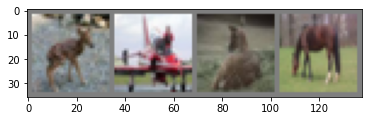

 deer plane  deer horse


In [53]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 2. Define a Convolutional Neural Network

In [54]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 入力3個(RGB)、出力6個、カーネルは5px*5px
        self.pool = nn.MaxPool2d(2, 2) # カーネルは2px*2px, ストライドも2px
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [55]:
net = Net()

### 3. Define a Loss Function and Optimizer

In [56]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train a Network

In [60]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs) ## nn.Module.__call__() が呼ばれる。その中で、override された Net.forward() が呼ばれる。
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 1000 == 999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            
print('Finished Training')

[1,  1000] loss: 1.230
[1,  2000] loss: 1.216
[1,  3000] loss: 1.198
[1,  4000] loss: 1.231
[1,  5000] loss: 1.226
[1,  6000] loss: 1.241
[1,  7000] loss: 1.237
[1,  8000] loss: 1.196
[1,  9000] loss: 1.185
[1, 10000] loss: 1.164
[1, 11000] loss: 1.184
[1, 12000] loss: 1.162
[2,  1000] loss: 1.104
[2,  2000] loss: 1.088
[2,  3000] loss: 1.114
[2,  4000] loss: 1.136
[2,  5000] loss: 1.111
[2,  6000] loss: 1.099
[2,  7000] loss: 1.103
[2,  8000] loss: 1.115
[2,  9000] loss: 1.111
[2, 10000] loss: 1.114
[2, 11000] loss: 1.073
[2, 12000] loss: 1.139
Finished Training


In [61]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### Test the Network on the Test Data

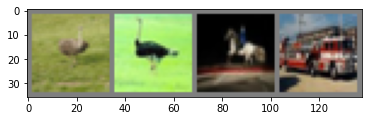

GroundTruth:   bird  bird horse truck


In [64]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [65]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [67]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   bird  bird horse truck


In [68]:
correct = 0.0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [69]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 67 %
Accuracy of   car : 75 %
Accuracy of  bird : 45 %
Accuracy of   cat : 55 %
Accuracy of  deer : 49 %
Accuracy of   dog : 32 %
Accuracy of  frog : 74 %
Accuracy of horse : 65 %
Accuracy of  ship : 70 %
Accuracy of truck : 64 %


### Training on GPU
-> I have no GPUs now.

In [72]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu
